In [1]:
import os
import time
import math
from logging import getLogger
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
import cv2
# ViZDoom library
import vizdoom as vzd


In [16]:
IsFinished = False
possible_actions = np.identity(6,dtype=int).tolist()

In [52]:
game = vzd.DoomGame()
game.load_config('resources/temp_maps/temp.cfg')
#game.set_automap_buffer_enabled(True)
#game.set_automap_mode(vzd.AutomapMode.WHOLE)
#game.set_automap_rotate(False)
#game.set_automap_render_textures(False)
#game.set_depth_buffer_enabled(True)
game.init()
game.new_episode()
state = game.get_state()
st = state.screen_buffer.transpose(1,2,0)
img = np.array([st])  # Initialize as numpy array with first frame
game_variables = np.array([state.game_variables])  # Initialize as numpy array
am = state.automap_buffer.transpose(1,2,0)
auto_map = np.array([am])  # Initialize as numpy array
depth = np.array([state.depth_buffer])  # Initialize as numpy array
s=0
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
video = cv2.VideoWriter('./video{}.avi'.format(1),fourcc,10,(320,240))
game.set_automap_mode(vzd.AutomapMode.OBJECTS)
am = state.automap_buffer.transpose(1,2,0)
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.OBJECTS_WITH_SIZE)
am = state.automap_buffer.transpose(1,2,0)
auto_map = np.append(auto_map, [am], axis=0)
game.set_automap_mode(vzd.AutomapMode.NORMAL)
video.write(st)
for i in range(200):
    rand = np.random.randint(5)
    if i%20==0:
        game.make_action(possible_actions[5])
    else:
        game.make_action(possible_actions[2])
    state = game.get_state()
    st = state.screen_buffer.transpose(1,2,0)
    img = np.append(img, [st], axis=0)  # Append using np.append
    game_variables = np.append(game_variables, [state.game_variables], axis=0)
    am = state.automap_buffer.transpose(1,2,0)
    auto_map = np.append(auto_map, [am], axis=0)
    depth = np.append(depth, [state.depth_buffer], axis=0)
    video.write(st)
   
game.close()
video.release()

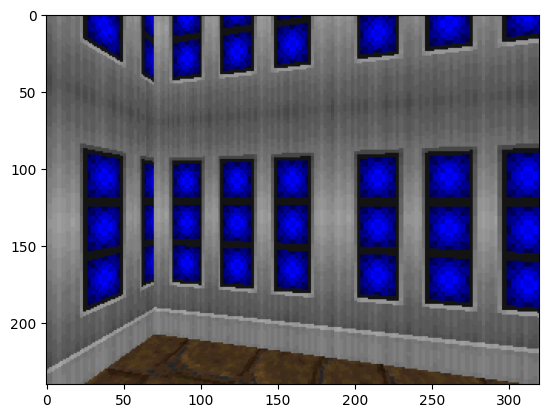

In [53]:
plt.imshow(img[1])

In [50]:
auto_map.shape,img.shape,depth.shape

((203, 240, 320, 3), (201, 240, 320, 3), (201, 240, 320))

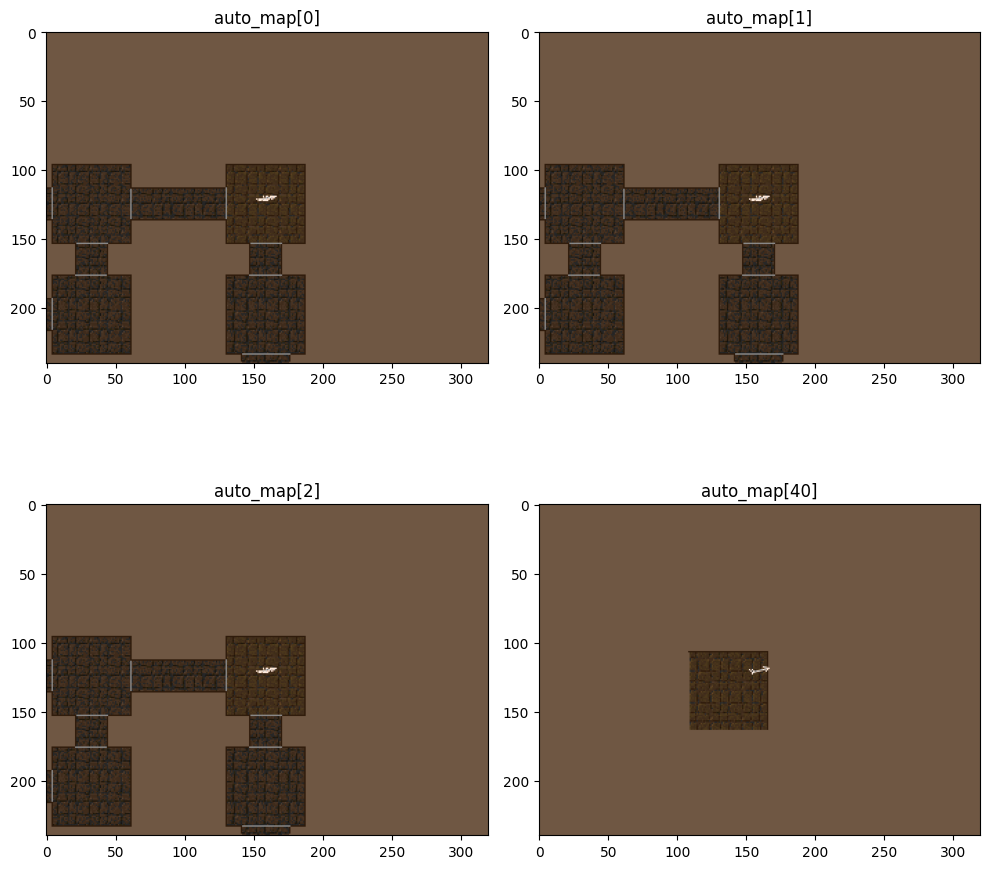

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.imshow(auto_map[0])
ax1.set_title('auto_map[0]')
ax2.imshow(auto_map[1]) 
ax2.set_title('auto_map[1]')
ax3.imshow(auto_map[2])
ax3.set_title('auto_map[2]')
ax4.imshow(auto_map[40])
ax4.set_title('auto_map[40]')
plt.tight_layout()

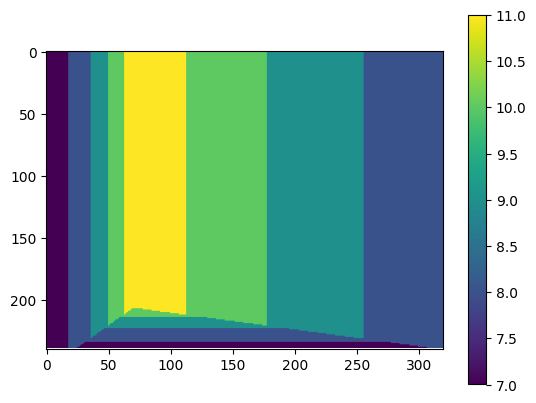

In [55]:
plt.imshow(depth[1])
plt.colorbar()
plt.show()


In [28]:
game_variables

array([[100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [100.],
       [10